In [1]:
import import_ipynb
from daily_commits import daily_commits
from history_to_day_duration import hours_per_day
from ReadPomodoros import pomofocus_to_df

importing Jupyter notebook from daily_commits.ipynb
importing Jupyter notebook from ReadGitTimestamps.ipynb
importing Jupyter notebook from history_to_day_duration.ipynb
importing Jupyter notebook from ReadPomodoros.ipynb


In [5]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
date_format = '%d %b'

ci_df = daily_commits("CalipsoProject")
hours_df = hours_per_day("CalipsoProject")
pom_df = pomofocus_to_df("CALIPSO")
print(hours_df.to_html())
# print(pom_df)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>duration_hour</th>
      <th>duration_day</th>
      <th>projet</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2024-10-03</th>
      <td>0.17</td>
      <td>0.021</td>
      <td>CalipsoProject</td>
    </tr>
    <tr>
      <th>2024-10-04</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2024-10-05</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2024-10-06</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2024-10-07</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2024-10-08</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2024-10-09</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2024-10-10</th>
      <td>NaN</td>
      <td

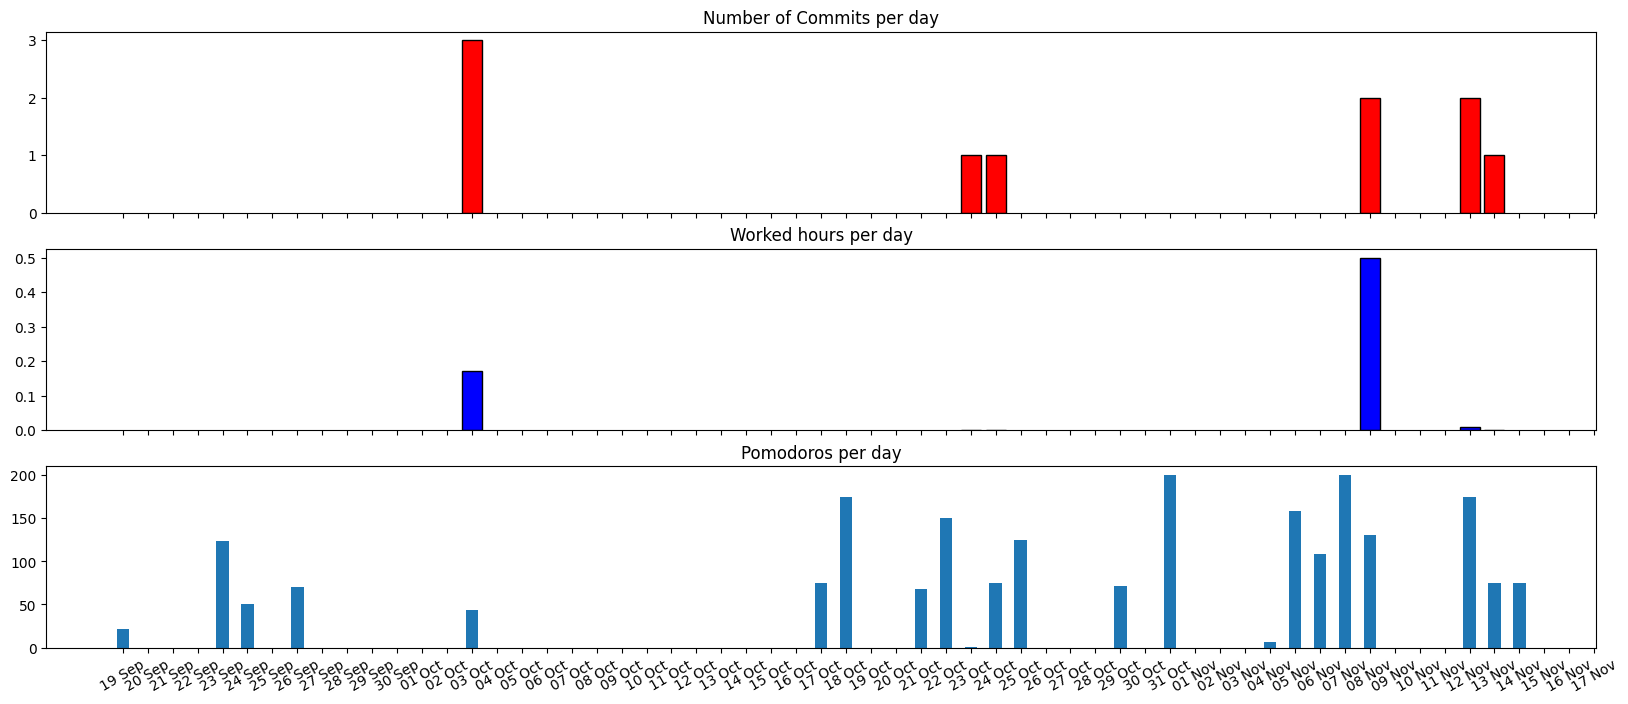

In [3]:

import pandas as pd

from datetime import date, timedelta
# get current montth day
today = date.today()

month_before = today - timedelta(days=60)
month_after = today + timedelta(days=30)


pd_dr = pd.date_range(start=month_before, end=month_after, freq="D")


pom_df = pom_df.reindex(pd_dr)
hours_df = hours_df.reindex(pd_dr)
ci_df = ci_df.reindex(pd_dr)
 
fig, ax  = plt.subplots(3, figsize=(20,8), sharex=True)

ax[0].tick_params(axis='x', labelsize=10, rotation=30)

ax[0].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax[0].set_title("Number of Commits per day")
bc=ax[0].bar(pd_dr,ci_df.commits , color="red", width=0.8, edgecolor="black")

ax[1].tick_params(axis='x', labelsize=10, rotation=30)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax[1].set_title("Worked hours per day")
contbc=ax[1].bar(pd_dr,hours_df.duration_hour , color="blue", width=0.8, edgecolor="black")



ax[2].tick_params(axis='x', labelsize=10, rotation=30)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax[2].set_title("Pomodoros per day")
ax[2].set_xticks(pd_dr)
pbc=ax[2].bar(pd_dr, pom_df, width=0.5)